You have to create a langchain conversational agent for the dataset mentioned below

Steps:

1- Download the dataset from: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

2- From the structured data, create unstructured data like the figure mentioned below
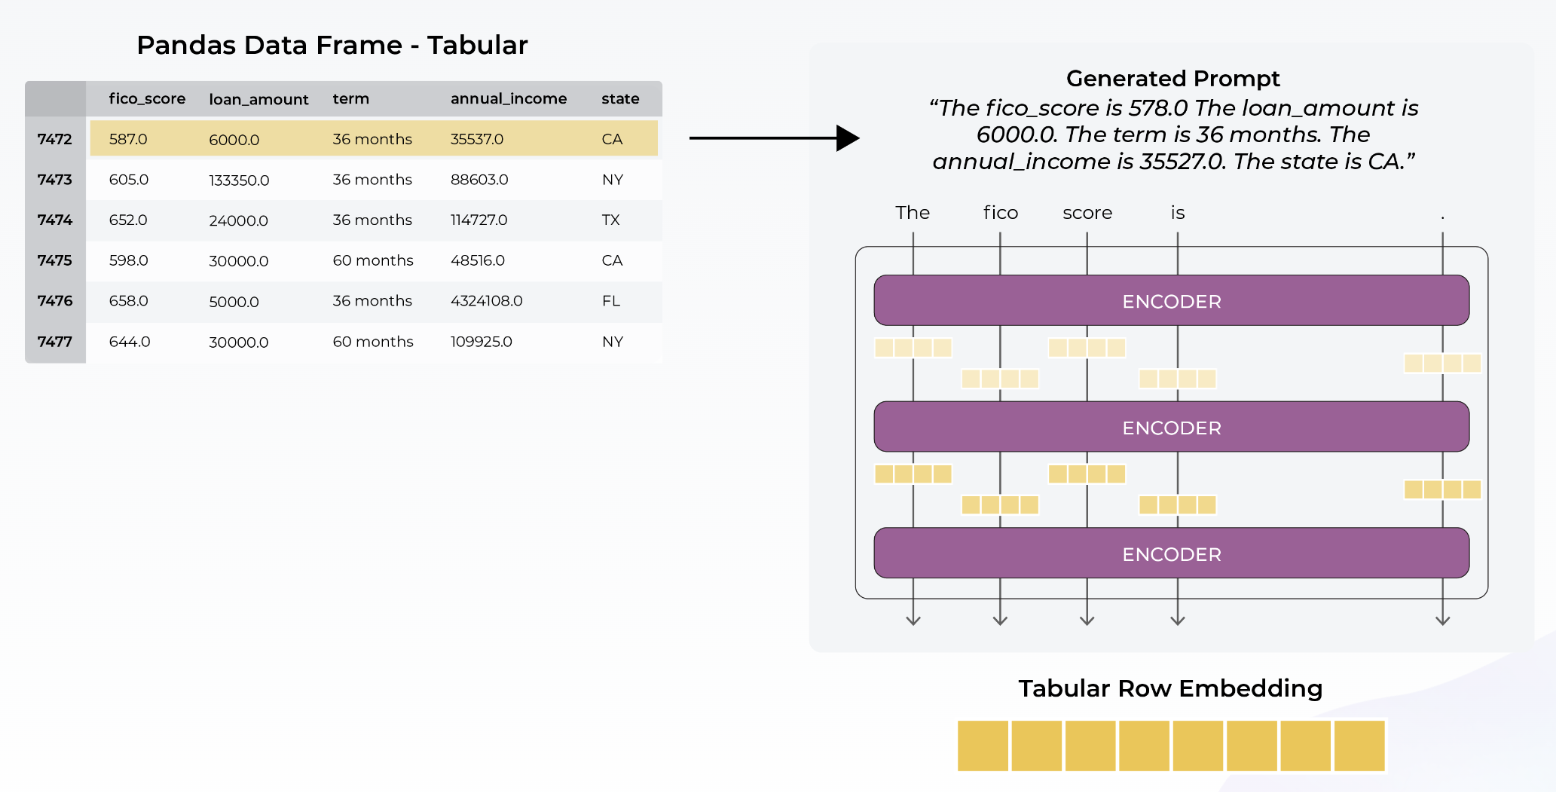
3 - Create a langchain conversational agent from the langchain website. Below is an example of such an agent:

https://python.langchain.com/en/latest/modules/agents/agents/custom_llm_chat_agent.html

# **Part - 01**

Creating unstructured data from structured data

## SubStep 01
Download data from Kaggle and upload to Colab environment

1.   Download data from Kaggle and upload to Colab environment
2.   Unzip the files
3.   Merge Etfs Files into one CSV (), keeping file name, which will be the key for merging data with meta data file
4.   Now join the meta data and get the all columns
5.   Iterate through all rows and with the help of lamda function, convert data into unstructure data and save it in additional columns 'unstructured_data'
6.   Similarly we will do with stock folder (Step 3 to Step 5)
7.   As the size of the of consolidated file is huge, will process data in batches and later will merge the data into one file



In [ ]:
import pandas as pd
import os
import glob

In [ ]:
import zipfile

def unzip_folder(zip_path, output_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_path)

# Usage
zip_path = r'/content/drive/MyDrive/MSDS/NLP Midterm/stock_data.zip'
output_path = r'.'

unzip_folder(zip_path, output_path)


In [ ]:
# get data file names
path =r'/content/etfs' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['file_name'] = file_
    list_.append(df)
frame = pd.concat(list_)
frame.to_csv('etfs.csv', index=False)
# clean memory
del frame

In [ ]:
# remove the path from the file name and '.csv', only to be stored in same column
etfs = pd.read_csv('etfs.csv')
etfs['file_name'] = etfs['file_name'].str.replace(r'etfs/', '')
etfs['file_name'] = etfs['file_name'].str.replace(r'.csv', '')
etfs['file_name'] = etfs['file_name'].str.replace(r'/content/', '')
etfs.head()

<ipython-input-14-dbede68ed70a>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  etfs['file_name'] = etfs['file_name'].str.replace(r'.csv', '')


,Date,Open,High,Low,Close,Adj Close,Volume,file_name
0,2017-05-11,24.870001,24.870001,24.870001,24.870001,23.437246,140000.0,LVUS
1,2017-05-12,24.903000,24.903000,24.903000,24.903000,23.468348,1000.0,LVUS
2,2017-05-15,25.000000,25.000000,24.987000,24.987000,23.547504,500.0,LVUS
3,2017-05-16,24.987000,24.987000,24.987000,24.987000,23.547504,100.0,LVUS
4,2017-05-17,24.650000,24.650000,24.650000,24.650000,23.229921,500.0,LVUS


In [ ]:
metaData = pd.read_csv('symbols_valid_meta.csv')

In [ ]:
# add additional columns to the etfs dataframe from metaData dataframe where the symbol and file_name are the same as inner join
etfs = pd.merge(etfs, metaData,  how='inner', left_on=['file_name'], right_on = ['Symbol'])
etfs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,file_name,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,2017-05-11,24.870001,24.870001,24.870001,24.870001,23.437246,140000.0,LVUS,Y,LVUS,Hartford Multifactor Low Volatility US Equity ETF,Z,,Y,100.0,N,NaN,LVUS,LVUS,N
1,2017-05-12,24.903000,24.903000,24.903000,24.903000,23.468348,1000.0,LVUS,Y,LVUS,Hartford Multifactor Low Volatility US Equity ETF,Z,,Y,100.0,N,NaN,LVUS,LVUS,N
2,2017-05-15,25.000000,25.000000,24.987000,24.987000,23.547504,500.0,LVUS,Y,LVUS,Hartford Multifactor Low Volatility US Equity ETF,Z,,Y,100.0,N,NaN,LVUS,LVUS,N
3,2017-05-16,24.987000,24.987000,24.987000,24.987000,23.547504,100.0,LVUS,Y,LVUS,Hartford Multifactor Low Volatility US Equity ETF,Z,,Y,100.0,N,NaN,LVUS,LVUS,N
4,2017-05-17,24.650000,24.650000,24.650000,24.650000,23.229921,500.0,LVUS,Y,LVUS,Hartford Multifactor Low Volatility US Equity ETF,Z,,Y,100.0,N,NaN,LVUS,LVUS,N


In [ ]:
etfs['unstructured_data'] = etfs.apply(
    lambda x: f"The symbol is {x['Symbol']}, and the security name is {x['Security Name']} and on {x['Date']}, the opening price was {x['Open']}, the highest price was {x['High']}, the lowest price was {x['Low']}, the closing price was {x['Close']}, the adjusted closing price was {x['Adj Close']}, and the volume was {x['Volume']}. It {'is ' if x['Nasdaq Traded'] == 'Y' else 'is not'} traded on Nasdaq. The listing exchange is {x['Listing Exchange']}{', and it belongs to the market category ' + x['Market Category'] if x['Market Category'] else ''}. It is {'an' if x['ETF'] == 'Y' else 'not'} ETF, and the round lot size is {x['Round Lot Size']}. The test issue is {'issued' if x['Test Issue'] == 'Y' else 'not issued'}{', and the financial status is ' + str(x['Financial Status']) if pd.notna(x['Financial Status']) else ''}{', the CQS symbol is ' + x['CQS Symbol'] if pd.notna(x['CQS Symbol']) else ''}. The Nasdaq symbol is {x['NASDAQ Symbol']}, and the NextShares product is {x['NextShares']}.",
    axis=1
)
# use symbol, unstructured_data, and index columns only in csv file in new file name etfs_unstructured_data_short.csv
etfs[['Symbol', 'unstructured_data']].to_csv('etfs_unstructured_data_short.csv', index=False)
# clean memory
del etfs

In [ ]:
# get data file names
path =r'stocks' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['file_name'] = file_
    list_.append(df)
frame = pd.concat(list_)
frame.to_csv('stocks.csv', index=False)
del frame

In [ ]:
# remove the path from the file name and '.csv', only to be stored in same column
stocks = pd.read_csv('stocks.csv')
stocks['file_name'] = stocks['file_name'].str.replace(r'stocks/', '')
stocks['file_name'] = stocks['file_name'].str.replace(r'.csv', '')
stocks.info()

In [ ]:
stocks = pd.merge(stocks, metaData,  how='inner', left_on=['file_name'], right_on = ['Symbol'])
stocks.head()

In [ ]:
# as the data is too large, we will do it in batches and create a new column unstructured_data
# convert it in batches of 1000000 rows and store it in a new column unstructured_data

# make a loop to iterate over the rows in batches of 1000000
for i in range(0, len(stocks), 1000000):
    # create a new column unstructured_data and store the string in it
    stocks.loc[i:i+1000000, 'unstructured_data'] = stocks.loc[i:i+1000000].apply(
        lambda x: f"The symbol is {x['Symbol']}, and the security name is {x['Security Name']} and on {x['Date']}, the opening price was {x['Open']}, the highest price was {x['High']}, the lowest price was {x['Low']}, the closing price was {x['Close']}, the adjusted closing price was {x['Adj Close']}, and the volume was {x['Volume']}. It {'is ' if x['Nasdaq Traded'] == 'Y' else 'is not'} traded on Nasdaq. The listing exchange is {x['Listing Exchange']}{', and it belongs to the market category ' + x['Market Category'] if x['Market Category'] else ''}. It is {'an' if x['ETF'] == 'Y' else 'not'} ETF, and the round lot size is {x['Round Lot Size']}. The test issue is {'issued' if x['Test Issue'] == 'Y' else 'not issued'}{', and the financial status is ' + str(x['Financial Status']) if pd.notna(x['Financial Status']) else ''}{', the CQS symbol is ' + x['CQS Symbol'] if pd.notna(x['CQS Symbol']) else ''}. The Nasdaq symbol is {x['NASDAQ Symbol']}, and the NextShares product is {x['NextShares']}.",
        axis=1
    )
    # save the file in csv format with the name stocks_unstructured_data_short.csv with batch number
    stocks.loc[i:i+1000000, ['Symbol', 'unstructured_data']].to_csv(f'stocks_unstructured_data_short_{i}.csv', index=False)

del stocks


### Concate data into a single file

In [ ]:
import csv

file1_path = '/content/etfs/etfs_unstructured_data_short.csv'
file2_path = '/content/drive/MyDrive/Copy of stock_short_merged_output.csv'
output_path = '/content/drive/MyDrive/Updated_stock_short_merged_output.csv'

# Open both input files and the output file
with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2, open(output_path, 'w', newline='') as output_file:
    reader1 = csv.reader(file1)
    reader2 = csv.reader(file2)
    writer = csv.writer(output_file)

    # Write the header from file2 to the output file
    header = next(reader2)
    writer.writerow(header)

    # Copy the contents of file2 to the output file
    for row in reader2:
        writer.writerow(row)

    # Append the contents of file1 to the output file
    for row in reader1:
        writer.writerow(row)

print("Data appended successfully.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## SubStep 02


1.   Now select number of rows to make the text file (in my case 1000 rows)
2.   Save it to stocks_short.txt file
3.   We will use this for *Part 2*





In [ ]:

# read stock_short_merged_output.csv to 1000 rows
stocks_short = pd.read_csv(r'/content/etfs_unstructured_data_short.csv', nrows=1000)
# csv to text file
stocks_short['unstructured_data'].to_csv('stocks_short.txt', index=False)

#**Part 2**

There are multiple strategies to achieve this,

1.   Using langchain with openAI
2.   Using langchain with HuggingFace API
3.   Using langChain with HuggingFace LocalModels and Embeddings
4.   Hybrid Approach - langchain + Huggingface (llm) with Api, and LocalEmbeddings - I opted this.



## Strategy 01 -> Using langchain with openAI

In [ ]:
!pip -q install langchain openai chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00


In [ ]:
import os
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader("/content/stocks_short.txt")
documents = loader.load()

In [ ]:
os.environ['OPENAI_API_KEY'] ='OPENAI_API_KEY'
llm = OpenAI(temperature=0.9)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)
documents = text_splitter.split_documents(documents)

embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(documents, embeddings)

In [ ]:
from langchain.chains import LLMChain
from langchain.chains.question_answering import load_qa_chain
from langchain.chains.conversational_retrieval.prompts import CONDENSE_QUESTION_PROMPT
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [ ]:
question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)
doc_chain = load_qa_chain(llm, chain_type="map_reduce")

chain = ConversationalRetrievalChain(
    retriever=vectorstore.as_retriever(),
    question_generator=question_generator,
    combine_docs_chain=doc_chain,
)

In [ ]:
chat_history = []
query = "what is the latest closing price of LVUS ?"
result = chain({"question": query, "chat_history": chat_history})
result['answer']

' The latest closing price of LVUS is 28.875.'

## Strategy 02 -> Using langchain with HuggingFace API

In [ ]:
!pip -q install langchain huggingface_hub transformers sentence_transformers accelerate bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 9.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'HUGGINGFACEHUB_API_TOKEN'

In [ ]:
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import ConversationalRetrievalChain

In [ ]:
from langchain import PromptTemplate, HuggingFaceHub, LLMChain

template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
llm=HuggingFaceHub(repo_id="google/flan-t5-large",
                                        model_kwargs={"temperature":0,
                                                      "max_length":64})

In [ ]:
from langchain.embeddings import HuggingFaceHubEmbeddings
repo_id = "sentence-transformers/all-mpnet-base-v2"
embeddings = HuggingFaceHubEmbeddings(
    repo_id=repo_id,
    task="feature-extraction",
    # huggingfacehub_api_token="HUGGINGFACEHUB_API_TOKEN",
)

You're using a different task than the one specified in the repository. Be sure to know what you're doing :)


In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader("/content/my_data.txt")
documents = loader.load()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)
documents = text_splitter.split_documents(documents)

vectorstore = Chroma.from_documents(documents, embeddings)

In [ ]:
from langchain.chains import LLMChain
from langchain.chains.question_answering import load_qa_chain
from langchain.chains.conversational_retrieval.prompts import CONDENSE_QUESTION_PROMPT
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [ ]:
question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)
doc_chain = load_qa_chain(llm, chain_type="map_reduce")

chain = ConversationalRetrievalChain(
    retriever=vectorstore.as_retriever(),
    question_generator=question_generator,
    combine_docs_chain=doc_chain,
)

In [ ]:
chat_history = []
query = "what is security name for symbol LVUS and what was closing priceon 2017-05-11?"
result = chain({"question": query, "chat_history": chat_history})
result['answer']

Token indices sequence length is longer than the specified maximum sequence length for this model (1705 > 1024). Running this sequence through the model will result in indexing errors


'Hartford Multifactor Low Volatility US Equity ETF'

## Strategy 03 -> Using langChain with HuggingFace LocalModels and Embeddings

#### Local LLM -> Huggingface

In [ ]:
from langchain.llms import HuggingFacePipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModelForSeq2SeqLM

model_id = 'google/flan-t5-small'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id, load_in_8bit=True, device_map='auto')

pipeline = pipeline(
    # "text2text-generation",
    model=model,
    # tokenizer=tokenizer,
    max_length=128
)

local_llm = HuggingFacePipeline(pipeline=pipeline)

In [ ]:
llm_chain = LLMChain(prompt=prompt,
                     llm=local_llm
                     )

question = "What is the capital of England?"

print(llm_chain.run(question))

In [ ]:
import pickle
import faiss
from langchain.vectorstores import FAISS

In [ ]:
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
# from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import DirectoryLoader, TextLoader

In [ ]:
# InstructorEmbedding
from InstructorEmbedding import INSTRUCTOR
from langchain.embeddings import HuggingFaceInstructEmbeddings

In [ ]:
loader = TextLoader('/content/output_10000.txt')
# loader = DirectoryLoader(f'{root_dir}/Documents/', glob="./*.pdf", loader_cls=PyPDFLoader)
documents = loader.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
                                               chunk_size=1000,
                                               chunk_overlap=200)

texts = text_splitter.split_documents(documents)

In [ ]:
def store_embeddings(docs, embeddings, sotre_name, path):

    vectorStore = FAISS.from_documents(docs, embeddings)

    with open(f"{path}/faiss_{sotre_name}.pkl", "wb") as f:
        pickle.dump(vectorStore, f)

In [ ]:
def load_embeddings(sotre_name, path):
    with open(f"{path}/faiss_{sotre_name}.pkl", "rb") as f:
        VectorStore = pickle.load(f)
    return VectorStore

In [ ]:
from langchain.embeddings import HuggingFaceInstructEmbeddings

instructor_embeddings = HuggingFaceInstructEmbeddings(model_name="hkunlp/instructor-xl",
                                                      model_kwargs={"device": "cuda"})

In [ ]:
root_dir = '/content'
Embedding_store_path = f"{root_dir}/Embedding_store"

In [ ]:
store_embeddings(texts,
                 instructor_embeddings,
                 sotre_name='instructEmbeddings',
                 path=Embedding_store_path)

In [ ]:
# Embedding_store_path = "/content/drive/MyDrive/MSDS/NLP Midterm"

In [ ]:
db_instructEmbedd = load_embeddings(sotre_name='instructEmbeddings',
                                    path=Embedding_store_path)

In [ ]:
# db_instructEmbedd = FAISS.from_documents(texts, instructor_embeddings)

In [ ]:
retriever = db_instructEmbedd.as_retriever()

In [ ]:
retriever.search_type

In [ ]:
retriever.search_kwargs

In [ ]:
docs = retriever.get_relevant_documents("What is opening price of CPSI on 2015-01-09")

In [ ]:
docs

In [ ]:
# create the chain to answer questions
qa_chain_instrucEmbed = RetrievalQA.from_chain_type(local_llm,
                                  chain_type="map_reduce",
                                  retriever=retriever,
                                  return_source_documents=False,
                                  verbose=True)

In [ ]:
## Cite sources

import textwrap

def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

def process_llm_response(llm_response):
    print(wrap_text_preserve_newlines(llm_response['result']))
    print('\nSources:')
    for source in llm_response["source_documents"]:
        print(source.metadata['source'])

In [ ]:
query = 'What is opening price of CPSI on 2015-01-09?'

print('-------------------Instructor Embeddings------------------\n')
llm_response = qa_chain_instrucEmbed(query)
process_llm_response(llm_response)

##Strategy ->04 Hybrid Approach - langchain + Huggingface (llm) with Api, and LocalEmbeddings - I opted this.

In [ ]:
!pip -q install langchain huggingface_hub transformers sentence_transformers accelerate bitsandbytes


In [ ]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'HUGGINGFACEHUB_API_TOKEN'

In [ ]:
from langchain import PromptTemplate, HuggingFaceHub, LLMChain

template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
llm=HuggingFaceHub(repo_id="google/flan-t5-large",model_kwargs={"temperature":0, "max_length":64})

In [ ]:
! pip install bitsandbytes > /dev/null

In [ ]:
!pip -q install langchain openai tiktoken chromadb pypdf sentence_transformers InstructorEmbedding faiss-cpu

In [ ]:
import pickle
import faiss
from langchain.vectorstores import FAISS
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.document_loaders import DirectoryLoader, TextLoader
# InstructorEmbedding
from InstructorEmbedding import INSTRUCTOR
from langchain.embeddings import HuggingFaceInstructEmbeddings

In [ ]:
loader = TextLoader('/content/output_10000.txt')
# loader = DirectoryLoader(f'{root_dir}/Documents/', glob="./*.pdf", loader_cls=PyPDFLoader)
documents = loader.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
                                               chunk_size=1000,
                                               chunk_overlap=200)

texts = text_splitter.split_documents(documents)

In [ ]:
def store_embeddings(docs, embeddings, sotre_name, path):

    vectorStore = FAISS.from_documents(docs, embeddings)

    with open(f"{path}/faiss_{sotre_name}.pkl", "wb") as f:
        pickle.dump(vectorStore, f)

In [ ]:
def load_embeddings(sotre_name, path):
    with open(f"{path}/faiss_{sotre_name}.pkl", "rb") as f:
        VectorStore = pickle.load(f)
    return VectorStore

In [ ]:
from langchain.embeddings import HuggingFaceInstructEmbeddings

instructor_embeddings = HuggingFaceInstructEmbeddings(model_name="hkunlp/instructor-xl",
                                                      model_kwargs={"device": "cuda"})

In [ ]:
root_dir = '/content'
Embedding_store_path = f"{root_dir}/Embedding_store"

In [ ]:
store_embeddings(texts,
                 instructor_embeddings,
                 sotre_name='instructEmbeddings',
                 path=Embedding_store_path)

In [ ]:
Embedding_store_path = "/content/drive/MyDrive/MSDS/NLP Midterm"

In [ ]:
db_instructEmbedd = load_embeddings(sotre_name='instructEmbeddings',
                                    path=Embedding_store_path)

In [ ]:
db_instructEmbedd = FAISS.from_documents(texts, instructor_embeddings)
docs = retriever.get_relevant_documents("What is opening price of CPSI on 2015-01-09")
docs

In [ ]:
qa_chain_instrucEmbed = RetrievalQA.from_chain_type(llm,
                                  chain_type="map_reduce",
                                  retriever=retriever,
                                  return_source_documents=False,
                                  verbose=True)

In [ ]:
## Cite sources

import textwrap

def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

def process_llm_response(llm_response):
    print(wrap_text_preserve_newlines(llm_response['result']))
    print('\nSources:')
    for source in llm_response["source_documents"]:
        print(source.metadata['source'])

In [ ]:
query = 'What is opening price of CPSI on 2015-01-09?'

print('-------------------Instructor Embeddings------------------\n')
llm_response = qa_chain_instrucEmbed(query)
process_llm_response(llm_response)